# Exploring how tertiary education affects male and female students

Even if Elon Musk thinks college is no longer necessary, graduating from tertiary education is still an essential life milestone with many ramifications and consequences. For example, in popular culture, doctors, engineers, and lawyers often are perceived to have better salaries and social positions. The World Bank defines tertiary education as: "all formal post-secondary education, including public and private universities, colleges, technical training institutes, and vocational schools. Tertiary education is instrumental in fostering growth, reducing poverty, and boosting shared prosperity."$^{[1]}$ However, as great as tertiary education sounds, women's participation in higher education did not take off until very recently $^{[2]}$(about 20 years ago), so the full effects of educated women in society are only starting to show up now. With this in mind, we want to dig into tertiary education graduates' earnings and employability, focusing on gender disparities. 

We are interested in knowing if men and women's chosen field of study affects their finances and job opportunities. We want to ask what each gender's preferred area of study is, how these preferences change over time, and how this preference affects both genders separately. For example, is the field where women are interested the most having difficulties? Are wages lower for these professionals?

Into what fields are women and men getting into?
Are these fields changing over time? Does it has any relationship with how much money each gender is earning? 
Are men/women enrolled in fields where the payment is lower? 


    [1] The World Bank (2021), https://www.worldbank.org/en/topic/tertiaryeducation
    [2] Parvazian, S., Gill, J., & Chiera, B. (2017). Higher Education, Women, and Sociocultural Change: A Closer Look at the Statistics. SAGE Open, 7(2). https://doi.org/10.1177/2158244017700230

## Data sources

|Dataframe name| Descriptive name | Source | Format |
|:---:|:---|:---|--- |
|Graduate_field| Graduates by field of study|https://stats.oecd.org/Index.aspx?DataSetCode=EDU_GRAD_FIELD| CSV file |
|Earning_field|Education and earnings by field of study|https://stats.oecd.org/Index.aspx?DataSetCode=EAG_EARNINGS_FIELD| CSV file |
|GDP_Capita|Countries GDP per capita|https://data.worldbank.org/indicator/NY.GDP.PCAP.CD| CSV File|


1. Graduates by field of study:

    This data contains OECD's information of the number of people who graduated from educational programmes by field and sex, per country and year. The authors used the "International Standard Classification of Education (ISCED)" to classify programs by *field of education*, *training* and *level* $^{[1]}$.  
   
    |COUNTRY|Country|SEX|Gender|EDUCATION_FIELD|Field|EDUCATION_LEV|Education level|MOBILITY|Mobility|YEAR|Year|Value|Flag Codes|Flags|
    |---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
    |CAN|Canada|M|Male|F99|Field unspecified (Broad field level)|ISCED11_7|Master’s or equivalent level|_T|Total|2005|2005|      39|nan|nan|
------
2. Education and earnings by field of study:  

   This dataset contains the OECD's lastest available information about people's earnings by field of study (according to ISCED), level of tertiary education, age, gender and country. *Relative Earnings* is a key indicator in this dataset, which the OECD defines as: "equal to the percentage of the mean annual earnings of an individual within a certain age group, gender and educational attainment relative to a baseline" $^{[1]}$. (If there is a value of relative earnings of 110 it means that they are making 10% more than the baseline person).
   
    |COUNTRY|Country|ISC11A|ISC11A.1|SEX|Gender|AGE|Age|EARN_CATEGORY|EARN_CATEGORY.1|FIELD|Field of study|INDICATOR|Indicator|MEASURE|Measure|YEAR|Year|Value|Flag Codes|Flags|
    |---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
    |FIN|Finland|L6|Bachelor’s or equivalent education|F|Women|Y35T44|35-44 years|FTFY_EARNERS|Full-time, full-year earners| F06|Information communication technologies (ICTs)|EARN_REL_ISC3OR3T4_DBF|Relative earnings..|VALUE|Value|2019|2019|135|m; b|Missing data; Series break |
    
    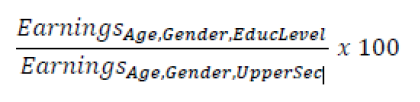
    
------

3. Countries GDP per capita:

    This will be an auxiliary dataset, it contains the Worlds bank's latest information about countried GDP per capita.

------

[1] OECD (2018), OECD Handbook for Internationally Comparative Education Statistics 2018: Concepts,
Standards, Definitions and Classifications, OECD Publishing, Paris.
https://doi.org/10.1787/9789264304444-en

## Data extraction

The first thing we will do is import all the necessary libraries. Then we will load everything to the notebook, start exploring what is in every column, classify them and check whether we need all the columns or not.

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
#We read the CSV files using pandas.
Graduate_field=pd.read_csv(r'graduates_field.csv')
Earning_field = pd.read_csv(r"earnings_field.csv")
Employment = pd.read_csv(r'employment.csv')
GDP_Capita = pd.read_csv(r'GDP.csv', skiprows=4)

#### Data extraction: Graduates by field of study:

In [3]:
#Here we take a general look at the columns and data types in the dataframe.
Graduate_field.info()
print()
#---------------------

#Here we are inspecting the number of unique values per every column in the dataframe.
print('\033[1m'+'Number of unique values per column:'+'\033[0m') 
print(Graduate_field.nunique())
print()
#---------------------    
    
#Here we print the unique values for Education level and Field, which can help us understand the data that we are deaing with. 
print('\033[1m'+'Values in Education level:'+'\033[0m')
[print(x) for x in Graduate_field['Education level'].unique()]
print()
print('\033[1m'+'Values in field of study:'+'\033[0m')
[print(x) for x in Graduate_field['Field'].unique()]
print()
#---------------------  

#Here we get to know how recent is our data, and what ranges to expect.
print('Range of years available:', Graduate_field['Year'].min(), '-', Graduate_field['Year'].max())
print()
#---------------------  

#We take a glimpse of the dataset using the .sample pandas function which returns a random sample of rows.
Graduate_field.sample(n = 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117944 entries, 0 to 117943
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   COUNTRY          117944 non-null  object 
 1   Country          117944 non-null  object 
 2   SEX              117944 non-null  object 
 3   Gender           117944 non-null  object 
 4   EDUCATION_FIELD  117944 non-null  object 
 5   Field            117944 non-null  object 
 6   EDUCATION_LEV    117944 non-null  object 
 7   Education level  117944 non-null  object 
 8   MOBILITY         117944 non-null  object 
 9   Mobility         117944 non-null  object 
 10  YEAR             117944 non-null  int64  
 11  Year             117944 non-null  int64  
 12  Value            92861 non-null   float64
 13  Flag Codes       28359 non-null   object 
 14  Flags            28359 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 13.5+ MB

Number of unique values p

,COUNTRY,Country,SEX,Gender,EDUCATION_FIELD,Field,EDUCATION_LEV,Education level,MOBILITY,Mobility,YEAR,Year,Value,Flag Codes,Flags
34874,LVA,Latvia,M,Male,F09,Health and welfare,ISCED11_645_646_655_656_665_66,"Bachelor's or equivalent level, first degrees ...",_T,Total,2017,2017,78.0,NaN,NaN
101030,GBR,United Kingdom,M,Male,F05,"Natural sciences, mathematics and statistics",ISCED11_45,Post-secondary non-tertiary vocational education,_T,Total,2018,2018,NaN,m,Missing value; data cannot exist
110603,SVK,Slovak Republic,F,Female,F10,Services,ISCED11_45,Post-secondary non-tertiary vocational education,_T,Total,2011,2011,190.0,NaN,NaN


In summary, the "*Graduate_field*" dataset has **117944 rows and 15 columns**, and by looking at the count of unique values and the dataset itself, we can say that the column "Value" is the actual column containing the number of graduates, all of the other columns represent different categories. Most columns are self-explanatory, like Country, Gender, and Year.


- The column *Country* refers to the statistic's origin, with data from **37 countries**. 
- The column *Field* stands for the Field of education, where there are **12 fields of study**.
- The column *Education level* stands for its name, and there are **8 different education levels**.
- The column *Years* has values from **2005 to 2020**.
- The column *Mobility* seems to be lacking any relevant information.
- The column *Flags* contains data flags or markers often used in data quality assurance. 
- The column *Value* measures the number of graduates for each gender, education field, country, and education level.

- The columns *COUNTRY, SEX, EDUCATION_FIELD, EDUCATION_LEV, MOBILITY, YEAR* and *Flag Codes* have the same information as their lowercap counterparts so **we will treat them as duplicates and drop them of the dataset.**

Moreover, from the .info() we get that around 20% of the data in *Value* are null or missing. The next step is to find out what values are missing from the data.

In [4]:
try:
    Graduate_field=Graduate_field.drop(columns=['COUNTRY','SEX','EDUCATION_FIELD','EDUCATION_LEV','MOBILITY','Mobility',
                                            'YEAR','Flag Codes','Flags']);
except:
    print('The columns have already been droped')
Graduate_field.rename(columns={'Value':'#Graduates'}, inplace = True)
Graduate_field.sample(n = 3)

,Country,Gender,Field,Education level,Year,#Graduates
106552,Austria,Total,Health and welfare,"Master’s or equivalent level, long first degre...",2016,1687.0
8023,Slovak Republic,Male,"Natural sciences, mathematics and statistics",Post-secondary non-tertiary vocational education,2012,0.0
39035,Spain,Male,Field unspecified (Broad field level),"Master’s or equivalent level, long first degre...",2019,0.0


The information this dataframe contains about the *education level* is too specific for our needs. To simplify, we will reduce the number of categories from eight to three. This will make the analysis easier to visualize and will prove handy when comparing this dataframe with the others (Earnings and Employability). Besides this, we will also shorten the names of the categories in the *Field* column.

|Old Category|New Category|
|:---|---|
|Master’s or equivalent level| Above Bachelor|
|Master’s or equivalent level, long first degree (at least 5 years)|Above Bachelor|
|Doctoral or equivalent level|Above Bachelor|
|Bachelor’s or equivalent level|Bachelor|
|Bachelor's or equivalent level, first degrees (more than 3 years)|Bachelor|
|Short-cycle tertiary education|Bachelor|
|Upper secondary vocational education|Below Bachelor|
|Post-secondary non-tertiary vocational education|Below Bachelor|

In [5]:
Graduate_field['Education level'].replace({
    'Master’s or equivalent level'                                      :'Above Bachelor',
    'Master’s or equivalent level, long first degree (at least 5 years)':'Above Bachelor',
    'Doctoral or equivalent level'                                      :'Above Bachelor',
    'Bachelor’s or equivalent level'                                    :'Bachelor',
    "Bachelor's or equivalent level, first degrees (more than 3 years)" :'Bachelor',
    'Short-cycle tertiary education'                                    :'Bachelor',
    'Upper secondary vocational education'                              :'Below Bachelor',
    'Post-secondary non-tertiary vocational education'                  :'Below Bachelor'}, inplace = True)

Graduate_field['Field'].replace({
    'Field unspecified (Broad field level)'              :'Unspecified',
    'Arts and humanities'                                :'Humanities',
    'Business, administration and law'                   :'Business',
    'Health and welfare'                                 :'Health',
    'Engineering, manufacturing and construction'        :'Engineering',
    'Natural sciences, mathematics and statistics'       :'Science',
    'Social sciences, journalism and information'        :'Social',
    'Agriculture, forestry, fisheries and veterinary'    :'Agriculture',
    'Generic programmes and qualifications'              :'Generic',
    'Information and Communication Technologies (ICTs)'  :'ICT',}, inplace = True)

print('Unique values in Field: ',Graduate_field['Field'].unique())
print('Unique values in Education level: ',Graduate_field['Education level'].unique())

Unique values in Field:  ['Unspecified' 'Humanities' 'Business' 'Health' 'Services' 'Engineering'
 'Science' 'Education' 'Social' 'Agriculture' 'Generic' 'ICT']
Unique values in Education level:  ['Above Bachelor' 'Bachelor' 'Below Bachelor']


To find out the distribution of the missing values, we will drop all the NaN values and save the result in an auxiliary dataframe called *Graduate_field_nonull*. Then we will compare the histograms of the nonull dataframe to the original dataframe. 

To do this, for every column in the original and the nonull dataframe we get the counts of unique values. Later, we will join these two series in a new dataset which we will plot using pyplot's *barh* function.

In [6]:
#We will define a function to compare the null and no-null values in each column
def compareDF_DFNonull(df,column):
    
    #We get the counts of unique values in the original dataframe and in the dataframe without null values.
    s1 = df[column].value_counts()
    s2 = df.dropna()[column].value_counts()
    
    #Next we form a dataframe with the two series we got from the previous step and sort it
    dfOut = pd.concat((s1.rename('counts'), s2.rename('counts no-null')), axis=1)
    dfOut.sort_values(by=['counts no-null'], inplace = True)
    
    #Finally, return the combined dataset of the counts for the full dataframe and the dataframe without null values.
    return dfOut

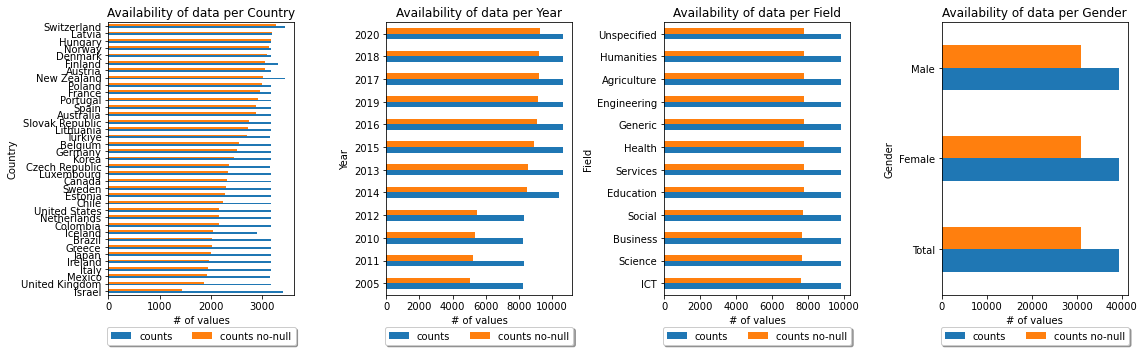

In [7]:
dfmCountry=compareDF_DFNonull(Graduate_field,'Country')
dfmYear=compareDF_DFNonull(Graduate_field,'Year')
dfmGender=compareDF_DFNonull(Graduate_field,'Gender')
dfmField=compareDF_DFNonull(Graduate_field,'Field')

#dfmField.index = dfmField.index.str[0:10]

#---------------------
#Now that we have the dataframes with the values comparison we will plot them using matplotlib.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))
ax0 = dfmCountry.plot(kind='barh',ax=axes[0])
ax0.set_title('Availability of data per Country'); ax0.set_ylabel("Country"); ax0.set_xlabel("# of values")
ax0.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
#--------
ax1 = dfmYear.plot(kind='barh',ax=axes[1])
ax1.set_title('Availability of data per Year'); ax1.set_ylabel("Year"); ax1.set_xlabel("# of values")
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
#--------
ax2 = dfmField.plot(kind='barh',ax=axes[2])
ax2.set_title('Availability of data per Field'); ax2.set_ylabel("Field"); ax2.set_xlabel("# of values")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
#--------
ax3 = dfmGender.plot(kind='barh',ax=axes[3])
ax3.set_title('Availability of data per Gender'); ax3.set_ylabel("Gender"); ax3.set_xlabel("# of values")
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

fig.tight_layout()

From the previous analysis we can see that the data is mostly balanced, which is good. The only problem we see is that some countries have many missing values and there is also lack of information for older years, it could be that countries with the most missing values like Israel, UK, and Mexico are missing a lot of data from the early years. For the scope of this project we will not deal with missing values anymore and will just drop all the missing values from this dataset.

In [8]:
Graduate_field.dropna(inplace = True)
#Final usable dataframe:
Graduate_field.sample(n = 3)

,Country,Gender,Field,Education level,Year,#Graduates
50674,Spain,Female,Health,Below Bachelor,2019,3641.0
66026,France,Total,Unspecified,Bachelor,2020,336.0
41772,Estonia,Male,Social,Below Bachelor,2018,0.0


#### Data extraction: Earnings by field of study:

In [9]:
#Here we take a general look at the columns and data types in the dataframe.
Earning_field.info()
print()
#---------------------

#Here we are inspecting the number of unique values per every column in the dataframe.
print('\033[1m'+'Number of unique values per column:'+'\033[0m')
print(Earning_field.nunique())
print()
#---------------------    

#Here we print the unique values for Education level and Field, which can help us understand the data that we are deaing with. 
print('\033[1m'+'Values in ISC11A.1: (Education level)'+'\033[0m')
[print(x) for x in Earning_field['ISC11A.1'].unique()]
print()
print('\033[1m'+'Values in field of study:'+'\033[0m')
[print(x) for x in Earning_field['Field of study'].unique()]
print()
print('\033[1m'+'Values in INDICATOR:'+'\033[0m')
[print(x) for x in Earning_field['Indicator'].unique()]
print()
print('\033[1m'+'Values in EARN_CATEGORY.1:'+'\033[0m')
[print(x) for x in Earning_field['EARN_CATEGORY.1'].unique()]
print()
print('\033[1m'+'Values in AGE:'+'\033[0m')
[print(x) for x in Earning_field['AGE'].unique()]
print()
#---------------------  
#We take a glimpse of the dataset using the .sample pandas function which returns a random sample of rows.
Earning_field.sample(n = 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44928 entries, 0 to 44927
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COUNTRY          44928 non-null  object 
 1   Country          44928 non-null  object 
 2   ISC11A           44928 non-null  object 
 3   ISC11A.1         44928 non-null  object 
 4   SEX              44928 non-null  object 
 5   Gender           44928 non-null  object 
 6   AGE              44928 non-null  object 
 7   Age              44928 non-null  object 
 8   EARN_CATEGORY    44928 non-null  object 
 9   EARN_CATEGORY.1  44928 non-null  object 
 10  FIELD            44928 non-null  object 
 11  Field of study   44928 non-null  object 
 12  INDICATOR        44928 non-null  object 
 13  Indicator        44928 non-null  object 
 14  MEASURE          44928 non-null  object 
 15  Measure          44928 non-null  object 
 16  YEAR             44928 non-null  int64  
 17  Year        

,COUNTRY,Country,ISC11A,ISC11A.1,SEX,Gender,AGE,Age,EARN_CATEGORY,EARN_CATEGORY.1,...,Field of study,INDICATOR,Indicator,MEASURE,Measure,YEAR,Year,Value,Flag Codes,Flags
6453,E22,European Union 22 members in OECD,L7T8,"Master’s, Doctoral or equivalent education",M,Men,Y35T44,35-44 years,FTFY_EARNERS,"Full-time, full-year earners",...,"Social sciences, journalism and information",EARN_REL_ISC3OR3T4_DBF,Relative earnings - ISCED 3 = 100 or ISCED 3+4...,VALUE,Value,2019,2019,NaN,m,Missing data
5231,CHE,Switzerland,L6,Bachelor’s or equivalent education,F,Women,Y25T34,25-34 years,PTPY_EARNERS,Part-time or part-year earners,...,"Social sciences, journalism and information",EARN_REL_FIELD,Relative earnings - all fields = 100,VALUE,Value,2020,2020,61.181782,w; r,Includes data from another category; Data belo...
41883,LVA,Latvia,L7T8,"Master’s, Doctoral or equivalent education",T,Total,Y35T44,35-44 years,PTPY_EARNERS,Part-time or part-year earners,...,Humanities (except languages),EARN_REL_MALE,Relative earnings - men = 100,VALUE,Value,2020,2020,NaN,m,Missing data


In summary, the "*Earning_field*" dataset has **44928 rows and 21 columns**, and by looking at the count of unique values and the dataset itself, we can say that the column "Value" is the actual column containing the percentage of earnings compared to that of a high school gradate. 

- In *Country* we have data from **16 countries**. 
- In *Field* there are **12 fields of study**.
- In *Education level* there are **4 different education levels**.
- The column *Years* has values from **2019 and 2020**.
- The column *Mobility* seems to be lacking any relevant information.
- The column *Flags* contains data flags or markers often used in data quality assurance. 
- The column *EARN_CATEGORY* contains three categories of earners, being Full-time, Part-time or all earners.
- The column *Value* measures the percentage of relative earnings according to the indicator.

Values in INDICATOR:
- Relative earnings - ISCED 3 = 100 or ISCED 3+4 =100 if data for ISCED 3 not available:
        -This means that the baseline will be ISCED 3 or ISCED 3+4, 
        -ISCED 3 is high school graduates,
        -ISCED 4 is post-secondary education but not tertiary.
        
        For this Indicator, the baseline used is the mean annual earnings of individuals with just an upper secondary education, and the value of the baseline is 100.
        
        
 
- Relative earnings - all fields = 100
        - The baseline used is the mean annual earnings of individuals when all the other fields are the same but Educational Field (Age, Country, Gender, etc). 
        
- Relative earnings - men = 100
        - The baseline used is the mean annual earnings of individuals when all the other fields are the same but Gender.
        - 100 means what a man makes.


- The columns *COUNTRY, ISC11A, SEX, Age, EARN_CATEGORY.1, EARN_CATEGORY, FIELD, Indicator, MEASURE, Measure, YEAR, Year, Flag Codes*, and *Flags* **are considered redundant or inconsequencial thus, will be dropped.**

Moreover, from the .info() we get that around 70% of the data in *Value* are null or missing, we will follow the same approach as for the previous dataset.

In [10]:
try:
    Earning_field.drop(columns=['COUNTRY', 'ISC11A', 'SEX',
                                'Age', 'EARN_CATEGORY.1','EARN_CATEGORY','FIELD', 'Indicator',
                                'MEASURE', 'Measure', 'YEAR', 
                                'Flag Codes','Flags'], inplace = True)
except:
    print("Columns have already been dropped")
    
Earning_field.rename(columns={'ISC11A.1':'Education level', 'Field of study':'Field'}, inplace = True)
Earning_field.sample(n = 3)

,Country,Education level,Gender,AGE,Field,INDICATOR,Year,Value
14190,Costa Rica,"Master’s, Doctoral or equivalent education",Total,Y25T64,"Business, administration and law",EARN_REL_FIELD,2020,92.680717
38610,Estonia,"Master’s, Doctoral or equivalent education",Total,Y35T44,Health (Medical & Dental),EARN_REL_ISC3OR3T4_DBF,2020,175.260800
20186,Switzerland,Short-cycle tertiary education,Women,Y25T34,Health and welfare,EARN_REL_FIELD,2020,NaN


We will change *Education level* and *Field* so that its values can be compared to those in the previous dataset.

|Old Category|New Category|
|:---|---|
|Master’s, Doctoral or equivalent education| Above Bachelor|
|Bachelor’s or equivalent education|Bachelor|
|Short-cycle tertiary education|Bachelor|
|Tertiary education|Tertiary education|


In [11]:
Earning_field['Education level'].replace({
    'Master’s, Doctoral or equivalent education'                        :'Above Bachelor',
    'Bachelor’s or equivalent education'                                :'Bachelor',
    'Short-cycle tertiary education'                                    :'Bachelor'}, inplace = True)

Earning_field['Field'].replace({
    'Arts'                                               :'Humanities',
    'Humanities (except languages)'                      :'Humanities',
    'Arts and humanities'                                :'Humanities',
    'Business, administration and law'                   :'Business',
    'Health (Nursing and associate health fields)'       :'Health',
    'Health (Medical & Dental)'                          :'Health',
    'Health and welfare'                                 :'Health',
    'Engineering, manufacturing & construction'          :'Engineering',
    'Natural sciences, mathematics and statistics'       :'Science',
    'Social sciences, journalism and information'        :'Social',
    'Information communication technologies (ICTs)'      :'ICT',}, inplace = True)

print('Unique values in Field: ',Earning_field['Field'].unique())
print('Unique values in Education level: ',Earning_field['Education level'].unique())

Unique values in Field:  ['ICT' 'Humanities' 'Health' 'Social' 'Education' 'Science' 'Business'
 'Engineering']
Unique values in Education level:  ['Bachelor' 'Above Bachelor' 'Tertiary education']


In [12]:
a=Earning_field['Field'].sort_values().unique()
b=Graduate_field['Field'].sort_values().unique()
print ( 'The exclusive-or Fields in both datasets: \n', np.setxor1d(a, b) )
print()
a=Earning_field['Country'].sort_values().unique()
b=Graduate_field['Country'].sort_values().unique()
print ( 'The common Countries in both datasets: \n', np.intersect1d(a, b) )

The exclusive-or Fields in both datasets: 
 ['Agriculture' 'Generic' 'Services' 'Unspecified']

The common Countries in both datasets: 
 ['Australia' 'Austria' 'Denmark' 'Estonia' 'Finland' 'Germany' 'Latvia'
 'Norway' 'Portugal' 'Sweden' 'Switzerland' 'United Kingdom']


Even if '*Earning_field*' contains less countries, both sources have data for the same **12 countries**, so we can make direct comparisons for these countries.

Now we will analyse the behaviour of the missing values:

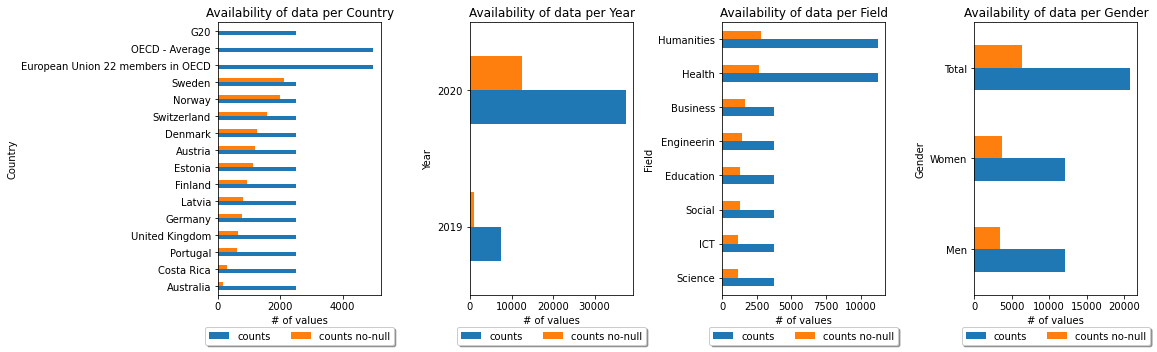

In [13]:
dfmCountry=compareDF_DFNonull(Earning_field,'Country')
dfmYear=compareDF_DFNonull(Earning_field,'Year')
dfmGender=compareDF_DFNonull(Earning_field,'Gender')
dfmField=compareDF_DFNonull(Earning_field,'Field')

dfmField.index = dfmField.index.str[0:10]

#---------------------
#Now that we have the dataframes with the values comparison we will plot them using matplotlib.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))
ax0 = dfmCountry.plot(kind='barh',ax=axes[0])
ax0.set_title('Availability of data per Country'); ax0.set_ylabel("Country"); ax0.set_xlabel("# of values")
ax0.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
#--------
ax1 = dfmYear.plot(kind='barh',ax=axes[1])
ax1.set_title('Availability of data per Year'); ax1.set_ylabel("Year"); ax1.set_xlabel("# of values")
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
#--------
ax2 = dfmField.plot(kind='barh',ax=axes[2])
ax2.set_title('Availability of data per Field'); ax2.set_ylabel("Field"); ax2.set_xlabel("# of values")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
#--------
ax3 = dfmGender.plot(kind='barh',ax=axes[3])
ax3.set_title('Availability of data per Gender'); ax3.set_ylabel("Gender"); ax3.set_xlabel("# of values")
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

fig.tight_layout()

From the previous analysis we can see that there are many missing values (70%), especially for many countries. **This is bad because this dataset only contains good information from a few selected countries.** Moreover, the countries represented in this dataset belong almost exclusively to Europe, which can be considered homogeneous economically speaking.

Since there are only two years (2019 and 2020) **we can not do a time analysis with this dataset.** We will drop the year column and treat all data as the latest available.

For the analysis we want to perform we will forfeit the *EARN_CATEGORY* column because we are not interested in seeing differences between full-time and part time workers, so we will treat every data point as just employed workers.

As for the previous dataset, will just drop all the missing values. 


In [14]:
try:
    Earning_field.drop(columns=['Year'], inplace = True)
except:
    print("Columns have already been dropped")
    
Earning_field.dropna(inplace = True)
Earning_field

,Country,Education level,Gender,AGE,Field,INDICATOR,Value
7,Norway,Bachelor,Men,Y25T34,Education,EARN_REL_FIELD,78.501854
13,Estonia,Above Bachelor,Total,Y25T34,Health,EARN_REL_FIELD,86.927521
16,Switzerland,Tertiary education,Total,Y25T34,Social,EARN_REL_FIELD,94.381340
17,Norway,Bachelor,Total,Y25T64,Social,EARN_REL_FIELD,99.200768
22,Estonia,Above Bachelor,Women,Y35T44,ICT,EARN_REL_ISC3OR3T4_DBF,208.694210
...,...,...,...,...,...,...,...
44911,Norway,Above Bachelor,Total,Y35T44,Science,EARN_REL_MALE,73.831856
44915,Sweden,Above Bachelor,Women,Y25T34,Education,EARN_REL_FIELD,94.573624
44916,Portugal,Tertiary education,Women,Y25T34,Social,EARN_REL_FIELD,89.178467
44919,Finland,Bachelor,Women,Y25T64,Humanities,EARN_REL_ISC3OR3T4_DBF,112.418900


## Programs
### Into what fields are women and men getting into? 
For most of the subsequent analysis, we need the total number of graduates. We will use this value to calculate the percentage of graduates per study area for each country, year, etc.

First, we will calculate the most popular Field of study across all times and countries for men and women. We can calculate this value by filtering the original data by men and women separately, grouping each by Field, and applying the sum() function. Through this, we will get the accumulated value of all the men and the value for women per Field.

Next, we can easily calculate the sum() of all the values for men and women and compute the percentage. 

Now, to calculate the relative difference between the gender shares for each field we take their difference divided by the maximum absolute value of the two numbers, and in the plot we considered all negative values as the positive relative difference for men.

Finally, we will plot the results in a horizontal bar graph that will allow us to see which fields are preferred by men and women.

,TotalGradFieldFemale,TotalGradFieldMale,%_of_female,%_of_male,%Diff_m_w,%Ratio_m_w
Field,,,,,,
Business,32686525.0,26229507.0,23.118868,22.624831,0.494038,2.183608
Health,30730709.0,8541298.0,21.735538,7.367482,14.368056,195.019902
Humanities,17393939.0,10219842.0,12.302568,8.815347,3.487221,39.558525
Education,14956936.0,4518417.0,10.578899,3.897459,6.681440,171.430680
Social,12389287.0,6771679.0,8.762825,5.841059,2.921766,50.021174
Services,10329885.0,7819243.0,7.306229,6.744658,0.561572,8.326169
Engineering,8116158.0,32546079.0,5.740481,28.073327,-22.332845,-389.041340
Science,6033032.0,5525255.0,4.267106,4.765929,-0.498822,-11.689948
Unspecified,4189091.0,3794028.0,2.962904,3.272621,-0.309717,-10.453156


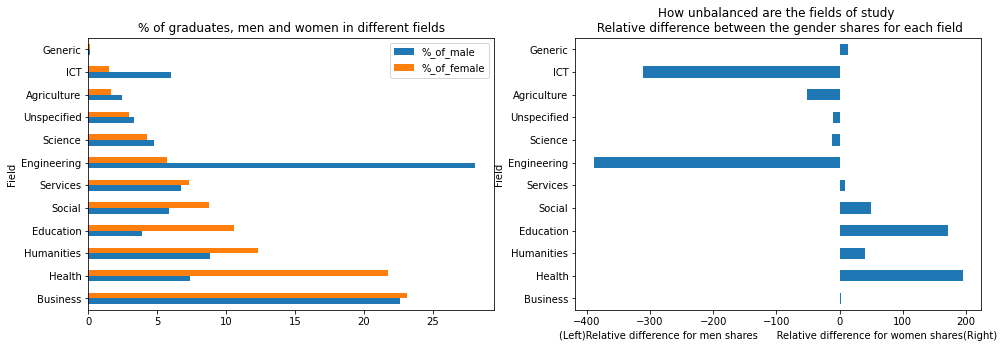

In [15]:
#First, we set two conditions, when Gender is female and when gender is male.
c1=Graduate_field['Gender']=='Female'
c2=Graduate_field['Gender']=='Male'

#We perform a group by Field using the sum() function to calculate the total number of female graduates and male graduates.
g1=Graduate_field[(c1)].groupby(['Field']).agg(TotalGradFieldFemale=('#Graduates', 'sum'))
g2=Graduate_field[(c2)].groupby(['Field']).agg(TotalGradFieldMale=('#Graduates', 'sum'))
g3=pd.merge(g1, g2, left_index=True, right_index=True)

#We calculate the percentage of men per field:
#We divide the number of graduates per field over the total number of men and women.
g3['%_of_female'] = (g3['TotalGradFieldFemale'] / int(g1.sum())) * 100
g3['%_of_male'] = (g3['TotalGradFieldMale'] / int(g2.sum()) ) * 100

g3.sort_values('%_of_female',ascending=False, inplace = True)


#To calculate the gender percent increase difference between the share of Graduates in each field,
# (How much percent is A greater than B?) A= % of women,  B= % of men.
#We use the formula : 
# If % of female is greater: (A - B) / A.
# If % of male is greater: (A - B) / B.

g3['%Diff_m_w']= (g3['%_of_female'] - g3['%_of_male'] )
g3['%Ratio_m_w']= np.where(g3['%Diff_m_w']>0,(g3['%Diff_m_w']/g3['%_of_male'])*100,(g3['%Diff_m_w']/g3['%_of_female'])*100)


#We plot the results:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax0 = g3[['%_of_male','%_of_female']].plot(kind='barh',ax=axes[0])
ax0.set_title('% of graduates, men and women in different fields')
ax1 = g3['%Ratio_m_w'].plot(kind='barh',ax=axes[1])
ax1.set_title('How unbalanced are the fields of study \n Relative difference between the gender shares for each field')
ax1.set_xlabel('(Left)Relative difference for men shares      Relative difference for women shares(Right)')

#We print the generated dataframe with all the calculated statistics.
g3

Overall, we can see there is a clear preference for **Business, Health and Engineering**. However, men and women preferences differ:


Here is the top 3 fields with most graduates overall *(of all times and countries)*:

Men prefer:
 1. Engineering ~28% of men.
 2. Business ~23% of men.
 3. Humanities  ~9% of men.

Women prefer:
 1. Business ~23% of women.
 2. Health ~21% of women.
 3. Humanities ~12% of women.
 
And, the fields with the biggest disparities:

MALE DOMINATED FIELDS:

 1. Engineering, The percentage share of men in this field is close to 4 times that of women.
 2. ICT, The men's share is 3 times more than that of women.
 
FEMALE DOMINATED FIELDS:

 1. Health, The share of women who graduated from this field is about double that of men. 
 2. Education, The women's share is 1.7 times more than men.


### How are preferences changing over time for each gender?

To find out how the distribution of graduates changed over time, 
 - First, we calculated the total number of female graduates per year. We grouped by year, calling the summation function.
 - Second, we calculated the number of female graduates per year and field of study. We grouped by Year and Field, calling the summation function.
 - Third, we merged the result data frames for the first and second steps.
 - Fourth, we computed the percentages by dividing the results of the second step by those of the first. ( # of females per field and year)/(Total # of females per year) * 100
 - Fifth, we repeat the previous steps for men and merge the resulting data frames.
 - Lastly, we plotted the calculated percentages per field and gender against time. 
 
 In order to plot the data, we took inspiration and used code from the following stackoverflow posts which explain how to manage color, legend position and categorical data using matplotlib. 
 
- [1] https://stackoverflow.com/questions/28779559/how-to-set-same-color-for-markers-and-lines-in-a-matplotlib-plot-loop
- [2] https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
- [3] https://stackoverflow.com/questions/43832311/how-to-plot-by-category-over-time

In [16]:
#We perform a group by Year using the sum() function to calculate the total number of female graduates graduates per year.
gf_fem = Graduate_field[c1].groupby(['Year']).agg(Total_per_year_Female=('#Graduates', 'sum'))
#Now groupby Year and Field, to get the number of female graduates per year and field.
gf_fem_2 = Graduate_field[c1].groupby(['Year','Field']).agg(Number_Female=('#Graduates', 'sum'))
#Merge the previous two dataframes to get one with total per year and total per year and field.
gf_fem_merge = pd.merge(gf_fem, gf_fem_2, left_index=True, right_index=True)


#We do exactly as before, but for men.  (c2 is the filter for men, as defined previously)
gf_men = Graduate_field[c2].groupby(['Year']).agg(Total_per_year_Male=('#Graduates', 'sum'))
gf_men_2 = Graduate_field[c2].groupby(['Year','Field']).agg(Number_Male=('#Graduates', 'sum'))
gf_men_merge = pd.merge(gf_men, gf_men_2, left_index=True, right_index=True)


#Merge the results for men and women.
gf_merge = pd.merge(gf_fem_merge, gf_men_merge, left_index=True, right_index=True)


#Compute the percentages using the corresponding operations.
gf_merge['%_of_female']= (gf_merge['Number_Female'] / gf_merge['Total_per_year_Female'])*100
gf_merge['%_of_male']= (gf_merge['Number_Male'] / gf_merge['Total_per_year_Male'])*100
gf_merge.head(20)

Total_per_year_Female  Number_Female  Total_per_year_Male  \
Year Field                                                                    
2005 Agriculture              6423630.0        99699.0            5418391.0   
     Business                 6423630.0      1555416.0            5418391.0   
     Education                6423630.0       642851.0            5418391.0   
     Engineering              6423630.0       359796.0            5418391.0   
     Generic                  6423630.0          779.0            5418391.0   
     Health                   6423630.0      1307149.0            5418391.0   
     Humanities               6423630.0       837912.0            5418391.0   
     ICT                      6423630.0       142669.0            5418391.0   
     Science                  6423630.0       232883.0            5418391.0   
     Services                 6423630.0       494423.0            5418391.0   
     Social                   6423630.0       573237.0            5418391.0   
     Unspecified              6423630.0       176816.0            5418391.0   
2010 Agriculture              7654461.0       116462.0            6054712.0   
     Business                 7654461.0      1789560.0            6054712.0   
     Education                7654461.0       897491.0            6054712.0   
     Engineering              7654461.0       374970.0            6054712.0   
     Generic                  7654461.0         1016.0            6054712.0   
     Health                   7654461.0      1757512.0            6054712.0   
     Humanities               7654461.0       860783.0            6054712.0   
     ICT                      7654461.0       112543.0            6054712.0   

                  Number_Male  %_of_female  %_of_male  
Year Field                                             
2005 Agriculture     134194.0     1.552066   2.476639  
     Business       1089352.0    24.213972  20.104714  
     Education       214017.0    10.007597   3.949826  
     Engineering    1733870.0     5.601132  31.999721  
     Generic            474.0     0.012127   0.008748  
     Health          312889.0    20.349071   5.774574  
     Humanities      501555.0    13.044213   9.256530  
     ICT             387349.0     2.221003   7.148783  
     Science         217425.0     3.625411   4.012723  
     Services        366254.0     7.696941   6.759461  
     Social          314918.0     8.923879   5.812021  
     Unspecified     146094.0     2.752587   2.696262  
2010 Agriculture     158745.0     1.521492   2.621842  
     Business       1331243.0    23.379308  21.986892  
     Education       276945.0    11.725071   4.574041  
     Engineering    1750809.0     4.898712  28.916470  
     Generic            561.0     0.013273   0.009266  
     Health          429124.0    22.960624   7.087439  
     Humanities      535108.0    11.245508   8.837877  
     ICT             351607.0     1.470293   5.807163

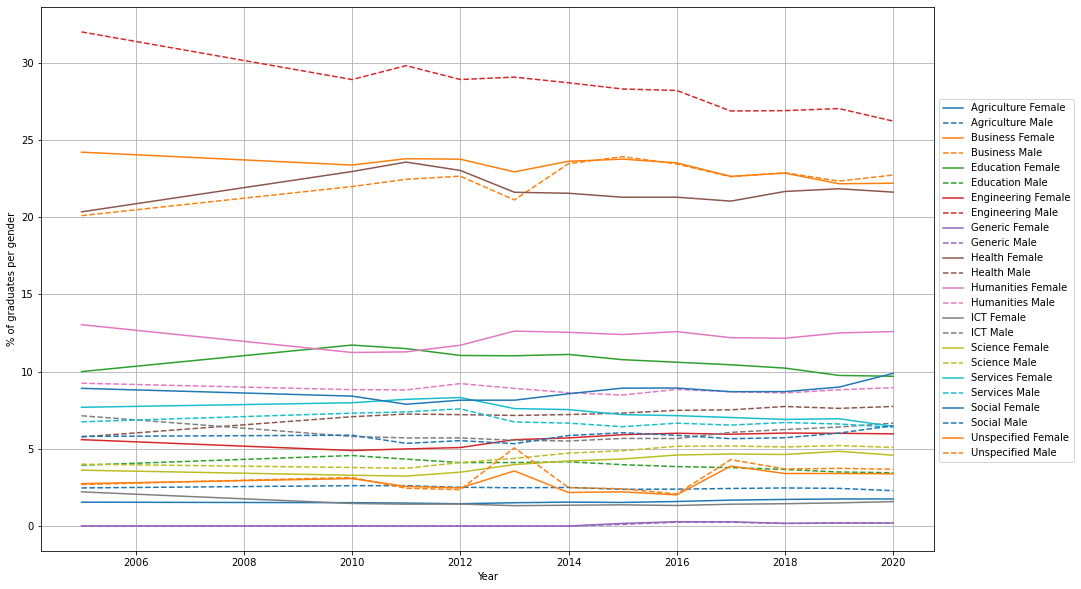

In [17]:
hh=gf_merge.reset_index().rename_axis(None, axis=1)

fig, ax = plt.subplots(figsize=(16, 10))

# key gives the category, data gives the actual values.
for key, data in hh.groupby('Field'):   

    color = next(ax._get_lines.prop_cycler)['color']
    data.plot(x='Year', y='%_of_female', ax=ax, label=key + ' Female',color=color)
    data.plot(x='Year', y='%_of_male', ax=ax, label=key + ' Male',linestyle='dashed',color=color)
    legend = ax.legend()
    legend.remove()
    ax.grid()
    ax.set_ylabel('% of graduates per gender')
    
fig.legend(bbox_to_anchor=(0.9, 0.5), loc="center left")

From the plot above, we can see that the shares of graduates per field do not have significant changes over time. The values have not changed more than 5% per field in 15 years.

However, we see that 

 - The share of men going into **engineering is slowy decreasing**, thus, more men are going into other fields.
 - The share of men and women going into business are slowly converging.
 - There is no obvious trend for all the other fields.

### What is the situation like country-wise?
We are going to repeat the exact same process as for the previous analysis. We will only change Year by Country in all the groupby operations, so that we are grouping by country. 
Moreover, we will only plot the most relevant fields where the differences are greater between men and women.
 - Engineering
 - ICT
 - Health
 - Education

In [18]:
gf_fem = Graduate_field[c1].groupby(['Country']).agg(Total_per_Country_Female=('#Graduates', 'sum'))
gf_fem_2 = Graduate_field[c1].groupby(['Country','Field']).agg(Number_Female=('#Graduates', 'sum'))
gf_fem_merge = pd.merge(gf_fem, gf_fem_2, left_index=True, right_index=True)

gf_men = Graduate_field[c2].groupby(['Country']).agg(Total_per_Country_Male=('#Graduates', 'sum'))
gf_men_2 = Graduate_field[c2].groupby(['Country','Field']).agg(Number_Male=('#Graduates', 'sum'))
gf_men_merge = pd.merge(gf_men, gf_men_2, left_index=True, right_index=True)

gf_merge = pd.merge(gf_fem_merge, gf_men_merge, left_index=True, right_index=True)

gf_merge['%_of_female']= (gf_merge['Number_Female'] / gf_merge['Total_per_Country_Female'])*100
gf_merge['%_of_male']= (gf_merge['Number_Male'] / gf_merge['Total_per_Country_Male'])*100
gf_merge.head(20)

Total_per_Country_Female  Number_Female  \
Country   Field                                                  
Australia Agriculture                 5367218.0        63000.0   
          Business                    5367218.0      1686373.0   
          Education                   5367218.0       557979.0   
          Engineering                 5367218.0       204341.0   
          Generic                     5367218.0           88.0   
          Health                      5367218.0      1424277.0   
          Humanities                  5367218.0       491743.0   
          ICT                         5367218.0        70696.0   
          Science                     5367218.0       202649.0   
          Services                    5367218.0       290258.0   
          Social                      5367218.0       312226.0   
          Unspecified                 5367218.0        63588.0   
Austria   Agriculture                 1149513.0        35716.0   
          Business                    1149513.0       315242.0   
          Education                   1149513.0       158939.0   
          Engineering                 1149513.0        85463.0   
          Generic                     1149513.0           64.0   
          Health                      1149513.0       148275.0   
          Humanities                  1149513.0        89462.0   
          ICT                         1149513.0         9784.0   

                       Total_per_Country_Male  Number_Male  %_of_female  \
Country   Field                                                           
Australia Agriculture               4316013.0      85411.0     1.173792   
          Business                  4316013.0    1335745.0    31.419872   
          Education                 4316013.0     216526.0    10.396056   
          Engineering               4316013.0    1120930.0     3.807205   
          Generic                   4316013.0         72.0     0.001640   
          Health                    4316013.0     398125.0    26.536597   
          Humanities                4316013.0     282775.0     9.161972   
          ICT                       4316013.0     261166.0     1.317181   
          Science                   4316013.0     181672.0     3.775680   
          Services                  4316013.0     208697.0     5.407979   
          Social                    4316013.0     189022.0     5.817278   
          Unspecified               4316013.0      35872.0     1.184748   
Austria   Agriculture               1019079.0      50699.0     3.107055   
          Business                  1019079.0     202909.0    27.423961   
          Education                 1019079.0      37865.0    13.826638   
          Engineering               1019079.0     428177.0     7.434714   
          Generic                   1019079.0        102.0     0.005568   
          Health                    1019079.0      51136.0    12.898941   
          Humanities                1019079.0      41795.0     7.782600   
          ICT                       1019079.0      62000.0     0.851143   

                       %_of_male  
Country   Field                   
Australia Agriculture   1.978933  
          Business     30.948586  
          Education     5.016806  
          Engineering  25.971423  
          Generic       0.001668  
          Health        9.224370  
          Humanities    6.551764  
          ICT           6.051094  
          Science       4.209255  
          Services      4.835412  
          Social        4.379551  
          Unspecified   0.831137  
Austria   Agriculture   4.974982  
          Business     19.911018  
          Education     3.715610  
          Engineering  42.016075  
          Generic       0.010009  
          Health        5.017864  
          Humanities    4.101252  
          ICT           6.083925

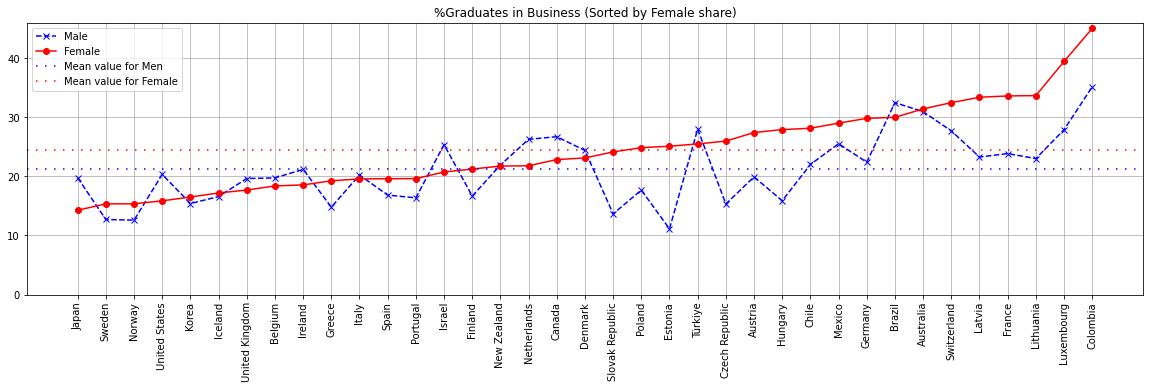

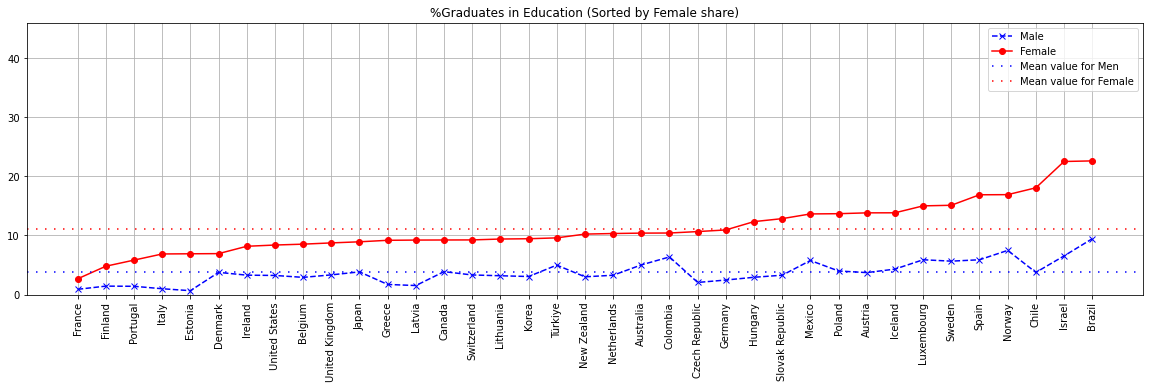

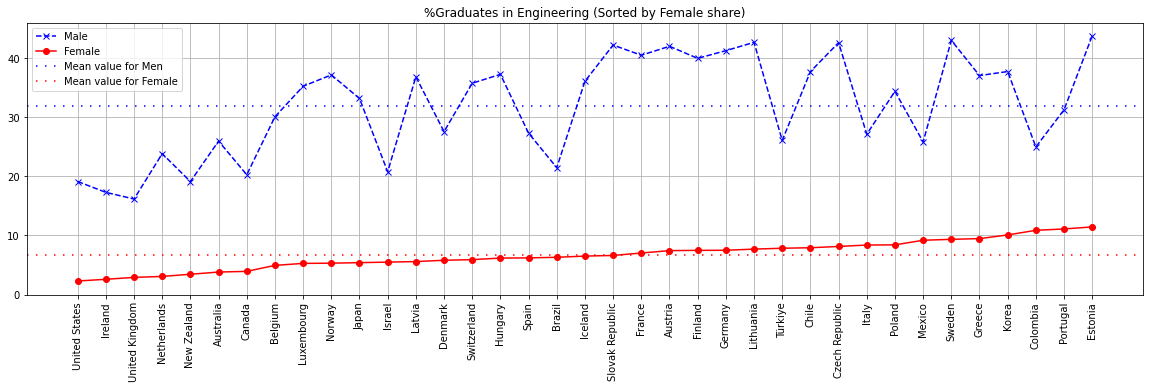

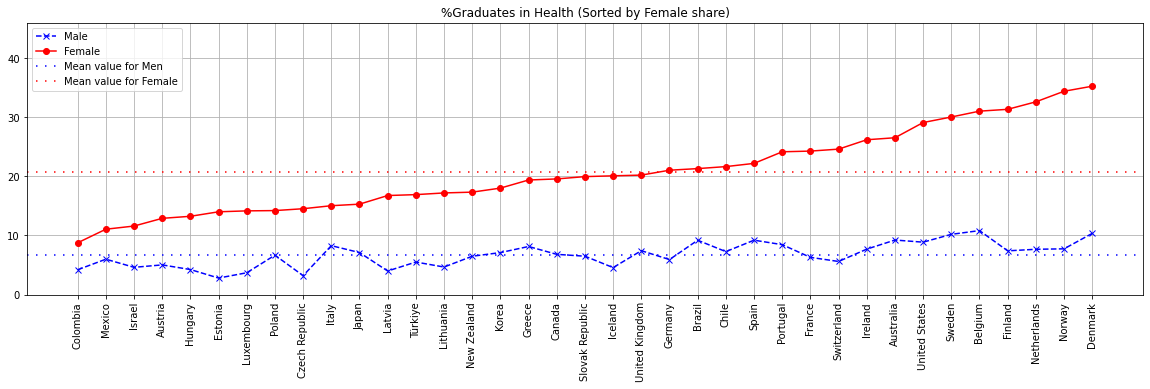

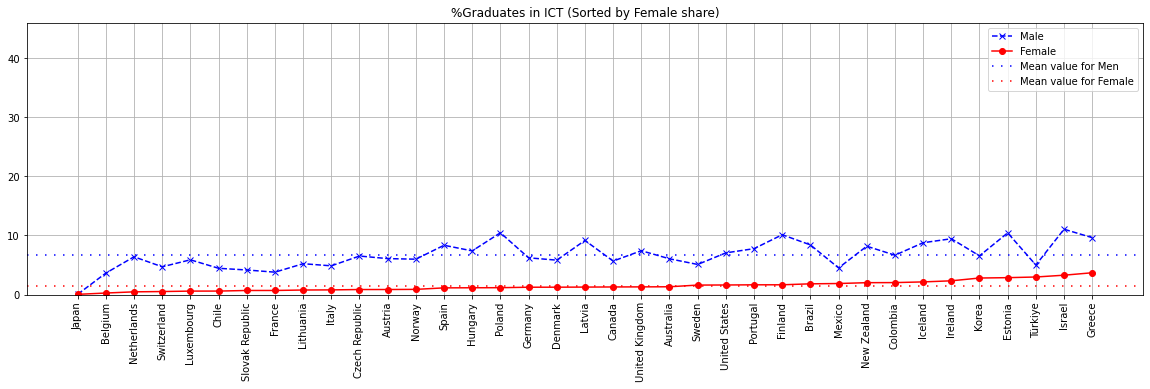

In [19]:
hh=gf_merge.reset_index().rename_axis(None, axis=1)

# We are only going to plot these fields, which are the ones we are interested in.
My_fields=['Engineering','ICT','Health','Education','Business']

# key gives the group name (i.e. category), data gives the actual values
for key, data in hh.groupby('Field'):   
    if key in My_fields:
        
        #We sort by % of females.
        data = data.sort_values(by=['%_of_female'])
        plt.figure(figsize=(20, 5))
        plt.plot(data['Country'],data['%_of_male'],'bx--',
                 data['Country'],data['%_of_female'],'ro-')
        plt.xticks(rotation=90)
        plt.grid()
        plt.title('%Graduates in '+key+' (Sorted by Female share)')
        plt.axhline(y=data['%_of_male'].mean(), color='b', linestyle='dotted',dashes=(1, 5))
        plt.axhline(y=data['%_of_female'].mean(), color='r', linestyle='dotted',dashes=(1, 5))
        plt.legend(('Male','Female','Mean value for Men','Mean value for Female'))
        plt.ylim((0,46))
        plt.show()


We see that the share of graduates in each field can vary a lot among different countries; for example, in Denmark, around 35% of women graduate from health while only 9% do so in Colombia. However, men and women have very distinct preferences. From this data, there is not one country where the number of females graduating from engineering is greater than that of men. Men's presence predominates in Engineering and ICT, while women predominate in Health and Education no matter the country.

In other fields, such as business there is no clear preference.

### Has GDP per Capita any effect in the share of graduates per field?

In this section, we will plot the exact same data as in the previous section, but we will sort the X-axes of the graphs by GDP per capita. We expect to see a pattern or a lack of a pattern.

We will use the GDP_Capita dataset to sort the previous result by the countries' GDP per Capita. 

 - First, select only the country name and GDP per capita values for the last year available.
 - Second, rename the columns to match the names in the previous dataset.
 - Third, set Country as index in both datasets.
 - Fourth, merge both datasets.
 - Fifth, sort the new combined dataset by the GDP per capita and plot.


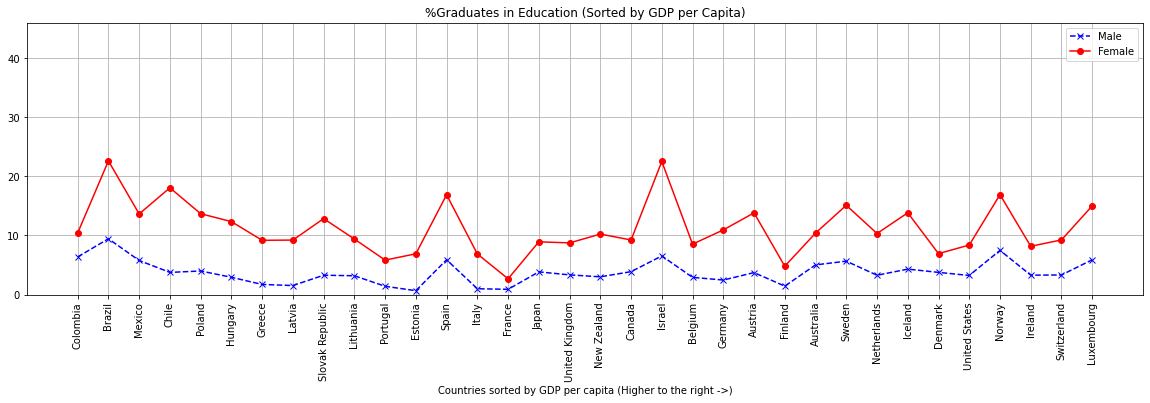

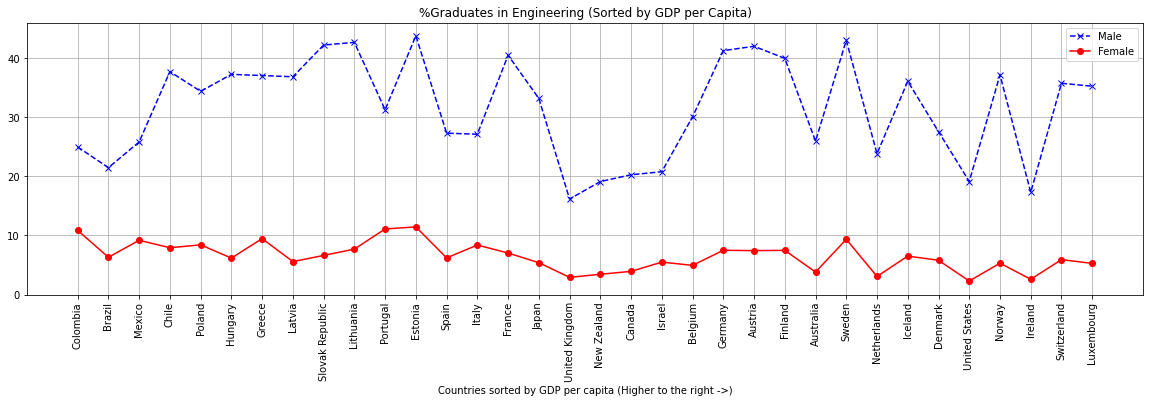

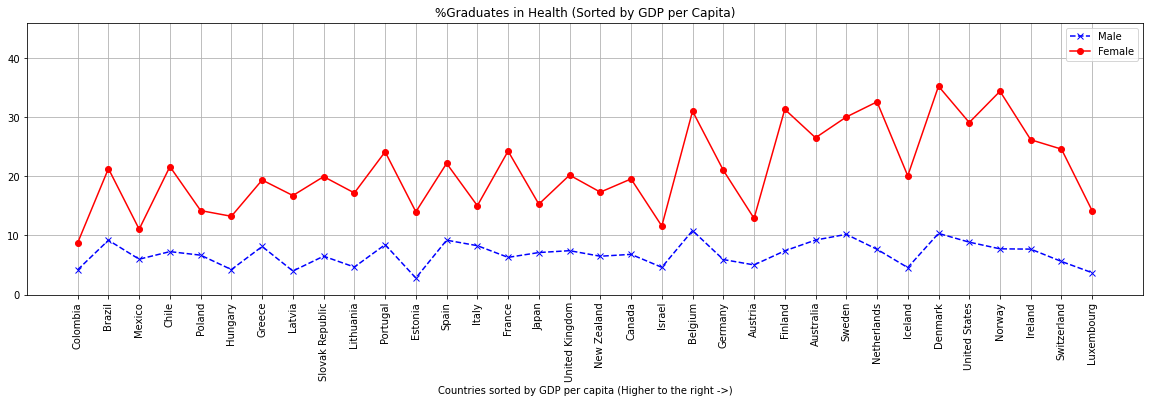

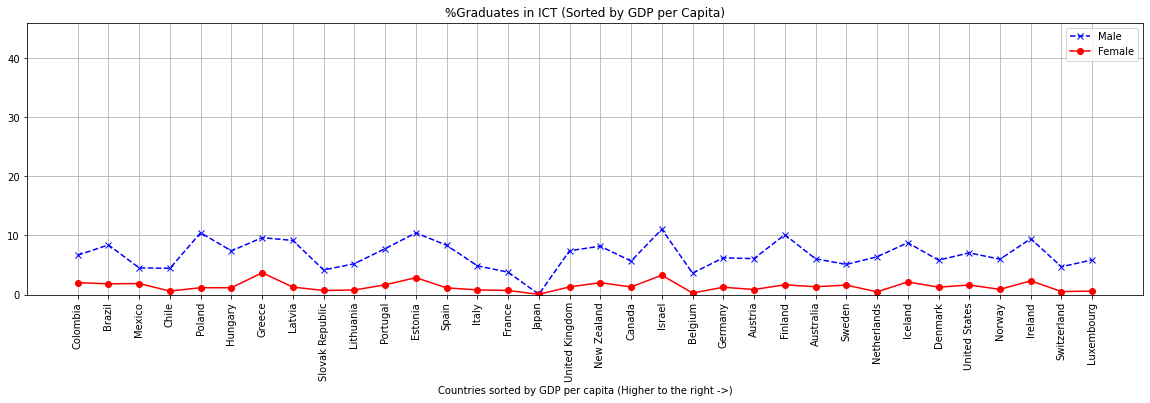

In [20]:
#Sort countries by GDP
GDP_Capita_2020=GDP_Capita[['Country Name', '2020']].copy()
GDP_Capita_2020.rename(columns={'Country Name': "Country", '2020':'GDP_Capita'}, inplace = True);  
GDP_Capita_2020.set_index(['Country'], inplace = True)

x=hh.set_index(['Country'])
df3 = pd.merge(x, GDP_Capita_2020, left_index=True, right_index=True,how='inner')
df3.reset_index(drop=False, inplace = True)
df3.sort_values(by=['GDP_Capita'],ascending =True, inplace = True)

My_fields=['Engineering','ICT','Health','Education']

for key, data in df3.groupby('Field'):   
    if key in My_fields:
        plt.figure(figsize=(20, 5))
        plt.plot(data['Country'],data['%_of_male'],'bx--',
                 data['Country'],data['%_of_female'],'ro-')
        plt.xticks(rotation=90)
        
        plt.title('%Graduates in '+key+' (Sorted by GDP per Capita)')
        plt.legend(('Male','Female'))
        plt.xlabel('Countries sorted by GDP per capita (Higher to the right ->)')
        plt.ylim((0,46))
        plt.grid()
        plt.show()

Using these graphs we failed to see any trend that can relate how the GDP per capita of a country can affect the shares of graduates in any field. 

### How do relative earnings* compare for graduates in male and female dominated fields?
#### Male dominated: Engineering, ICT.   vs   Female dominated: Health, Education.

To analyze the relative earnings for men and women per country and per field we will group by field, country and gender applying the mean() operation.

With this we get the mean value of all relative earnings for each country, field and gender.


*(compared to highschool graduates)

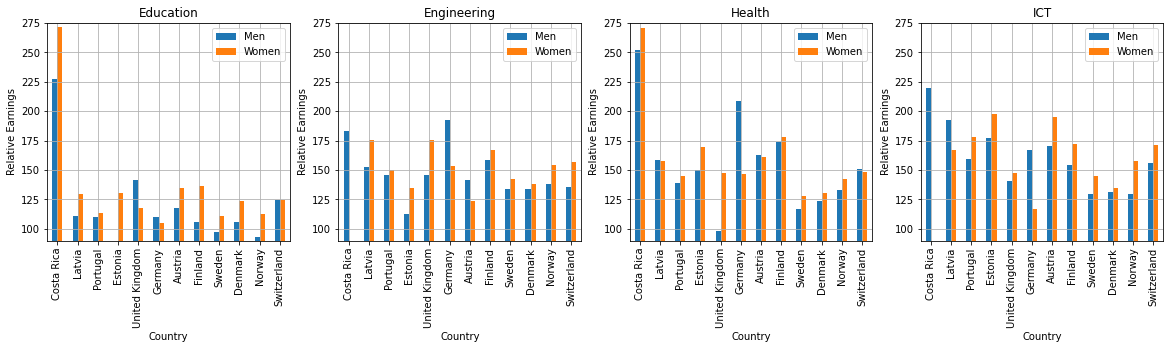

In [21]:
c1 = Earning_field['INDICATOR']=='EARN_REL_ISC3OR3T4_DBF'
c2 = Earning_field['Gender'] != 'Total'
eplot=Earning_field[c1 & c2].groupby(['Field','Country','Gender'])[['Value']].mean()

z=0
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for key, data in eplot.groupby('Field'):  
    if key in My_fields:
        
        x=data.reset_index().rename_axis(None, axis=1)
        x=x.set_index(['Country'])
        dfm = pd.merge(x, GDP_Capita_2020, left_index=True, right_index=True,how='left')
        dfm.sort_values(by=['GDP_Capita'],ascending =True, inplace = True)
        dfm=dfm.reset_index()


        dfm=dfm.pivot(('Country','GDP_Capita'),columns="Gender",values='Value')
        x=dfm.reset_index().rename_axis(None, axis=1)
        x.sort_values(by=['GDP_Capita'],ascending =True, inplace = True)
        x.drop(columns=['GDP_Capita'], inplace = True)
        x.set_index(['Country'], inplace = True)  
        
        
        ax = x.plot(kind='bar',ax=axes[z])
        ax.grid()
        ax.set_title(key)
        ax.set_ylabel('Relative Earnings')
        ax.set_ylim([90, 275])
        z+=1

We can now compare the values of relative earnings 'EARN_REL_MALE', which basically says how much is a woman making compared to what a man is making with the same level of education and country.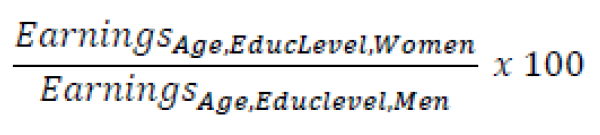

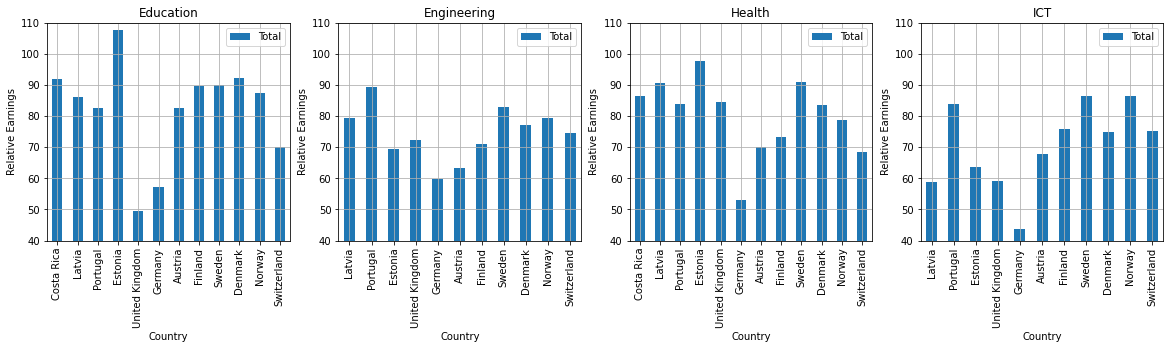

In [22]:
c1 = Earning_field['INDICATOR']=='EARN_REL_MALE'
c2 = Earning_field['Gender'] == 'Total'
eplot=Earning_field[c1 & c2].groupby(['Field','Country','Gender'])[['Value']].mean()

z=0
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for key, data in eplot.groupby('Field'):  
    if key in My_fields:
        
        #We merge with the GDP per capita dataset and sort by GDP per capita:
        
        x=data.reset_index().rename_axis(None, axis=1)
        x=x.set_index(['Country'])
        dfm = pd.merge(x, GDP_Capita_2020, left_index=True, right_index=True,how='left')
        dfm.sort_values(by=['GDP_Capita'],ascending =True, inplace = True)
        dfm=dfm.reset_index()


        dfm=dfm.pivot(('Country','GDP_Capita'),columns="Gender",values='Value')
        x=dfm.reset_index().rename_axis(None, axis=1)
        x.sort_values(by=['GDP_Capita'],ascending =True, inplace = True)
        x.drop(columns=['GDP_Capita'], inplace = True)
        x.set_index(['Country'], inplace = True)  
        
        
        ax = x.plot(kind='bar',ax=axes[z])
        ax.grid()
        ax.set_title(key)
        ax.set_ylabel('Relative Earnings')
        ax.set_ylim([40, 110])
        z+=1

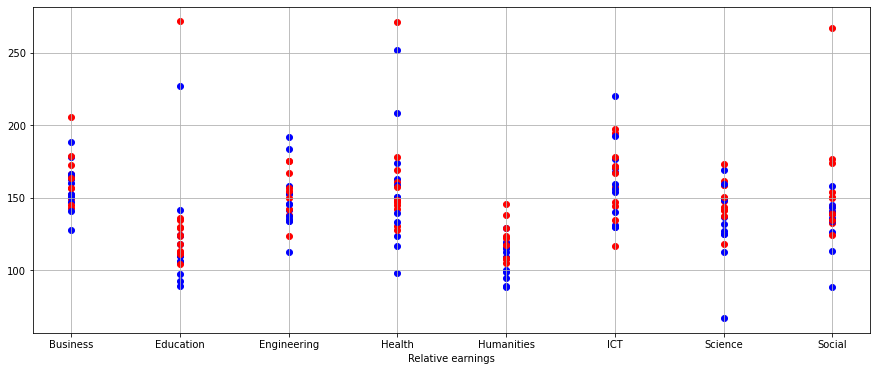

In [23]:
c1 = Earning_field['INDICATOR']=='EARN_REL_ISC3OR3T4_DBF'
c2 = Earning_field['Gender'] != 'Total'
eplot=Earning_field[c1 & c2].groupby(['Field','Country','Gender'])[['Value']].mean()
fff=eplot.reset_index()
c1=fff['Gender']=='Men'
c2=fff['Gender']=='Women'
c3=fff['Field']=='Health'
plt.figure(figsize=(15, 6))

z=0
for element in fff['Country'].unique():
    c3=fff['Country']==element
    plt.scatter(fff[c1&c3]['Field'],fff[c1&c3]['Value'], c='blue')
    plt.scatter(fff[c2&c3]['Field'],fff[c2&c3]['Value'], c='red')
    plt.xlabel('Relative earnings')
    z+=1
plt.grid()
plt.show()

## Results and analysis

#### Into what fields are women and men getting?

    Women prefer Business, Health, and Humanities in that order. Also, they have a predominant presence in Health and Education. Men prefer Engineering, Business, and Humanities in that order. Also, they have a predominant presence in Engineering and ICT.
    
####  How are preferences changing over time for each gender?

    We can see that the shares of graduates per field do not change significantly over time. The values have not changed more than 5% per field in 15 years. However, we see that the share of men going into engineering is slowly decreasing; thus, more men are going into other areas. There is no evident trend for all the other fields.
   
#### What is the situation like country-wise?

    We saw that preferences prevail regardless of the country and the country's GDP per capita. Every country has its distribution of graduates, but from our analysis, we can see that women still prefer health and education, and men still prefer engineering and Information technologies.
    
#### How do relative earnings compare for graduates in male and female dominated fields?

    First, getting a tertiary education greatly impacts the earnings for almost all fields. So, getting a degree impacts people's lives in that they will make more money. We don't know if this is because people who can afford to attend a university are already in an upper social class or if the university is the factor promoting the change.
    
    When we sorted the values by GDP per capita, we realized that the relative earnings are lower for countries with higher GDP per capita. We think this could be because in these countries, even people without a tertiary education have relatively high incomes when compared to poorer countries. On the contrary, in countries with lower GDP per capita where there are less educated people, proffessionals might be better compensated. 

    We see that tertiary education has better returns for women generally speaking, we see that the relative earnings for women are higher than those for men in most of the cases. This means that women see a better improvement of their income after getting a tertiary education. We think this might be the case because most women without a university diploma are working in low paying jobs like housekeeping, cooking, etc, and once they get an education they can enter a more specialized workforce. So we think that men even without tertiary education can get better jobs than women.
    
    Moreover, we can see that there is a clear disadvantage for people going into education because the relative earnings are much lower for this particular field compared to other fields. So we think women are particularly affected by this situation because they prefer education over other fields.
    
    Finally, we think that although the chosen field of study affects the earnings of women and men, we see that women are still making less money than men in almost every field and country, so we think that the world needs to cooperate in order to close this wage gap between men and women. 
    
    

#### What else could we investigate with this data?

    We could investigate further into employability per field, we can ask ourselfs more questions regarding the labour-market per education field, and gender.Furthermore, we could do a more profound analysis taking into account the education level, for the scope of this project we could not dwelve much into the diferences between bachelors, masters and doctorate studies and the consequences.
    